# Data Source


This dataset is provided by Yelp:https://www.yelp.com/dataset

Dataset Information ✈
We will be using 2 core datasets out of the 5

**1: Business dataset**

This dataset contains info about business objects like their name, 
location, stars, open hours, attributes, categories etc.

**2: Review dataset**

This dataset contain info about comments of users, stars etc.





# Imports

In [ ]:
#upload our dataset into Google Colab Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import json
from google.colab import files
import random
import nltk
# downlaod some resouces
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from matplotlib import pyplot as plt
# load the sentiment function
sia = SentimentIntensityAnalyzer()
# load the stemmer function 
porter = nltk.PorterStemmer()
import seaborn as sns


from wordcloud import WordCloud, STOPWORDS  
import numpy as np
from PIL import Image

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Integrate Business Dataset

In [ ]:
business_info = {}

In [ ]:
count = 0
with open('drive/MyDrive/Colab Notebooks/yelp_dataset/yelp_academic_dataset_business.json') as f:
  for i in f:
    line = eval(i.replace('null',"'null'",100))
    if count == 0:
      if 'business_id' not in business_info.keys():
        business_info['business_id'] = [line.get('business_id')]
      else:
        business_info['business_id'].append(line.get('business_id'))
      if 'name' not in business_info.keys():
        business_info['name'] = [line.get('name')]
      else:
        business_info['name'].append(line.get('name'))
      if 'address' not in business_info.keys():
        business_info['address'] = [line.get('address')]
      else:
        business_info['address'].append(line.get('address'))
      if 'city' not in business_info.keys():
        business_info['city'] = [line.get('city')]
      else:
        business_info['city'].append(line.get('city'))
      if 'state' not in business_info.keys():
        business_info['state'] = [line.get('state')]
      else:
        business_info['state'].append(line.get('state'))
      if 'postal_code' not in business_info.keys():
        business_info['postal_code'] = [line.get('postal_code')]
      else:
        business_info['postal_code'].append(line.get('postal_code'))
      if 'stars' not in business_info.keys():
        business_info['stars'] = [line.get('stars')]
      else:
        business_info['stars'].append(line.get('stars'))
      if 'review_count' not in business_info.keys():
        business_info['review_count'] = [line.get('review_count')]
      else:
        business_info['review_count'].append(line.get('review_count'))
    

In [ ]:
business_info = pd.DataFrame(business_info) #no duplicated business_id
print(business_info['business_id'].duplicated().sum())
business_info.rename(columns={'stars':'avg_stars'},inplace=True)#we can use quartile to remove outlier based on review_count 

0


In [ ]:
business_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160585 entries, 0 to 160584
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   160585 non-null  object 
 1   name          160585 non-null  object 
 2   address       160585 non-null  object 
 3   city          160585 non-null  object 
 4   state         160585 non-null  object 
 5   postal_code   160585 non-null  object 
 6   avg_stars     160585 non-null  float64
 7   review_count  160585 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 9.8+ MB


#Integrate Review Dataset with Resrvoir Sampling

**Split method 1: use reservoir_sampling method**

**Split method 2: select review data only in 2021**

Used these two methods comperatively, for actual dataset used method 1



**Split method 1**

In [ ]:
#reservoir sampling algorithm code
def reservoir_sampling(sampled_num, total_num):
    pool = []
    for i in range(0, total_num):#i is from 0 to 100000-1
        if i < sampled_num:
            pool.append(i)
        else:
            r = random.randint(0, i)
            if r < sampled_num:
                pool[r] = i
    return pool

In [ ]:
sampled_num = 100000
total_num = 8635403 # run code get the number of rows for review dataset 
pool = reservoir_sampling(sampled_num,total_num)

In [ ]:
#use set function to highly speed up the time that the code need to run for the following loop(hashmap principle)
pool = set(pool)

In [ ]:
#pool is a 100000 length list contains value from 0 to 8635402
import datetime
start = datetime.datetime.now()
if 8665403 in pool:
  print('a')
end = datetime.datetime.now()
print(end-start) 

0:00:00.011099


In [ ]:
pool_hash = set(pool)
#pool_hash is a 100000 length list contains value from 0 to 8635402
import datetime
start = datetime.datetime.now()
if 8665403 in pool_hash:
  print('a')
end = datetime.datetime.now()
print(end-start) 

0:00:00.000104


In [ ]:
print(0.011099/0.000104)

106.72115384615385


In [ ]:
print(10*106/60)

17.666666666666668


In [ ]:
review = {}

In [ ]:

count = 0
with open('drive/MyDrive/yelp_dataset/yelp_academic_dataset_review.json') as f:
  for i in f:
    if count == 100000:
      print(count)
    line = eval(i)
    if count in pool:
      if 'review_id' not in review.keys():
        review['review_id'] = [line.get('review_id')]
      else:
        review['review_id'].append(line.get('review_id'))
      if 'user_id' not in review.keys():
        review['user_id'] = [line.get('user_id')]
      else: 
        review['user_id'].append(line.get('user_id'))
      if 'business_id' not in review.keys():
        review['business_id'] = [line.get('business_id')]
      else:
        review['business_id'].append(line.get('business_id'))
      if 'stars' not in review.keys():
        review['stars'] = [line.get('stars')]
      else:
        review['stars'].append(line.get('stars'))
      if 'useful' not in review.keys():
        review['useful'] = [line.get('useful')]
      else:
        review['useful'].append(line.get('useful'))
      if 'funny' not in review.keys():
        review['funny'] = [line.get('funny')]
      else:
        review['funny'].append(line.get('funny'))
      if 'cool' not in review.keys():
        review['cool'] = [line.get('cool')]
      else:
        review['cool'].append(line.get('cool'))
      if 'text' not in review.keys():
        review['text'] = [line.get('text')]
      else:
        review['text'].append(line.get('text'))
      if 'date' not in review.keys():
        review['date'] = [line.get('date')]
      else:
        review['date'].append(line.get('date'))
    count += 1

100000


In [ ]:
review.keys()
review = pd.DataFrame(review)
review.to_csv('review_Reservoir_Sampling.csv')
files.download('review_Reservoir_Sampling.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
review.shape

(100000, 9)

**Split method 2**

In [ ]:
def return_count(fname):
    """count how many rows this dataset has
    """
    count = 0
    with open(fname) as file:
    #with open('drive/MyDrive/Colab Notebooks/yelp_dataset/yelp_review_dataset.json') as f:
        for line in file:
            count += 1
    return count

In [ ]:
file_path = 'drive/MyDrive/yelp_dataset/yelp_academic_dataset_review.json'
rows = return_count(file_path)#8635403 rows this line of code takes around 3 minutes to run 

In [ ]:
review_2021 = {}

In [ ]:
with open('drive/MyDrive/yelp_dataset/yelp_academic_dataset_review.json') as f:
  #data = json.load(f)
  #print(f.read())
  for i in f:
    line = eval(i)
    if '2021' in line.get('date'):
      if 'review_id' not in review_2021.keys():
        review_2021['review_id'] = [line.get('review_id')]
      else:
        review_2021['review_id'].append(line.get('review_id'))
      if 'user_id' not in review_2021.keys():
        review_2021['user_id'] = [line.get('user_id')]
      else: 
        review_2021['user_id'].append(line.get('user_id'))
      if 'business_id' not in review_2021.keys():
        review_2021['business_id'] = [line.get('business_id')]
      else:
        review_2021['business_id'].append(line.get('business_id'))
      if 'stars' not in review_2021.keys():
        review_2021['stars'] = [line.get('stars')]
      else:
        review_2021['stars'].append(line.get('stars'))
      if 'useful' not in review_2021.keys():
        review_2021['useful'] = [line.get('useful')]
      else:
        review_2021['useful'].append(line.get('useful'))
      if 'funny' not in review_2021.keys():
        review_2021['funny'] = [line.get('funny')]
      else:
        review_2021['funny'].append(line.get('funny'))
      if 'cool' not in review_2021.keys():
        review_2021['cool'] = [line.get('cool')]
      else:
        review_2021['cool'].append(line.get('cool'))
      if 'text' not in review_2021.keys():
        review_2021['text'] = [line.get('text')]
      else:
        review_2021['text'].append(line.get('text'))
      if 'date' not in review_2021.keys():
        review_2021['date'] = [line.get('date')]
      else:
        review_2021['date'].append(line.get('date'))
#this code runs for around 10 minutes

In [ ]:
review_2021.keys()
review_2021 = pd.DataFrame(review_2021)

In [ ]:
review_2021.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,WwQrc42RpDhtYb6hT9nlkQ,59FJ9lm1wMeGLIJ-5n5RNw,5Dunrbot7sEUdh9AfJoFew,1.0,0,0,0,They sell the regular bag for 10 cent that not...,2021-01-02 05:19:37
1,HWimuvPrR_K0MZ5d-m2tVA,VEPtsmLz5KR8-SQFbYW0Cw,Ueg6YilAQo22xo4Mb1hEkQ,3.0,0,0,0,I got two piercings here done after Christmas ...,2021-01-06 07:59:04
2,Cd3987OC1pEysZcWmVVZrA,uw4xvRuiGDJs_WwWai824Q,ewFMsE_X1PcS09yuO6eklA,5.0,0,0,0,If you are looking for an elegant and exquisit...,2021-01-09 00:18:20
3,2tqlFh2XbvP-Bo5IDrkahg,s7fT-atJBh1RBtrGQYP-Gw,DSEsFWzM3UCq54E2X0P9Zg,5.0,0,0,0,Just had the most amazing pizza ( the goat che...,2021-01-02 00:26:16
4,fPX9kGr_DLpVrCbx5LLdkg,FO1dSFMKrjl3U-lUvblqmg,PsSXBXBjZlWWpBUn-fbk4g,5.0,0,0,0,I started getting my hair cut at Atlas Barbers...,2021-01-10 02:46:53


In [ ]:
review_2021.shape
review_2021.to_csv('review_2021.csv')
files.download('review_2021.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv('review_Reservoir_Sampling.csv')
df = df.drop('Unnamed: 0',axis=1)

# Merge Review Dataset and Business Dataset

In [ ]:
df.head()#100000 rows

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4.0,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46
1,HgseF4yuseUvcrmCJXZliA,hcItyz0modqnxavedxxNBQ,xPo2OA5_wQgUEzAr-1o1Lg,5.0,0,0,0,best pizza on a busy street! my kids love it. ...,2008-12-03 20:41:59
2,n2RYgJE9_t8NbON1A-BtPQ,hGNAQaGLZrTyMJKPs9CSrg,0TU09h0pr6Jfd2VBorDAbw,5.0,0,0,0,Amazing Service!!! Very professional & courteo...,2017-03-03 18:26:13
3,Rw_has08oQcFkWElFJGYZg,p9TNT6pNKRuvBSzNf27JkQ,nVM8SLX5Yp3E6NNmL7tAPQ,4.0,0,0,0,Blood Orange Creamsicle you guys! Do I need to...,2015-08-19 04:14:26
4,LEfte130UweUSmsYiASMXg,Qp5vlturOI4KD4zmqrts1A,8IGgRKegd0H287W66X0BOw,3.0,2,0,0,My roommate and I have lived here since 2014 a...,2017-06-06 20:32:05


In [ ]:
business_info.head()

,business_id,name,address,city,state,postal_code,avg_stars,review_count
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,4.0,86
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,4.0,126
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,4.5,13
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,3.0,8
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,4.0,14


In [ ]:
df = df.merge(business_info, how = 'left', on = 'business_id')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   review_id     100000 non-null  object 
 1   user_id       100000 non-null  object 
 2   business_id   100000 non-null  object 
 3   stars         100000 non-null  float64
 4   useful        100000 non-null  int64  
 5   funny         100000 non-null  int64  
 6   cool          100000 non-null  int64  
 7   text          100000 non-null  object 
 8   date          100000 non-null  object 
 9   name          100000 non-null  object 
 10  address       100000 non-null  object 
 11  city          100000 non-null  object 
 12  state         100000 non-null  object 
 13  postal_code   100000 non-null  object 
 14  avg_stars     100000 non-null  float64
 15  review_count  100000 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memory usage: 13.0+ MB


# Descriptive Analytics

# Prelimnary analysis

In [ ]:
#df = pd.read_csv('review_Reservoir_Sampling.csv')
#df = df.drop('Unnamed: 0',axis=1)

In [ ]:
#basic info about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   review_id     100000 non-null  object 
 1   user_id       100000 non-null  object 
 2   business_id   100000 non-null  object 
 3   stars         100000 non-null  float64
 4   useful        100000 non-null  int64  
 5   funny         100000 non-null  int64  
 6   cool          100000 non-null  int64  
 7   text          100000 non-null  object 
 8   date          100000 non-null  object 
 9   name          100000 non-null  object 
 10  address       100000 non-null  object 
 11  city          100000 non-null  object 
 12  state         100000 non-null  object 
 13  postal_code   100000 non-null  object 
 14  avg_stars     100000 non-null  float64
 15  review_count  100000 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memory usage: 13.0+ MB


No null values

In [ ]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,address,city,state,postal_code,avg_stars,review_count
0,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4.0,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,Pho Van,8557 Research Blvd,Austin,TX,78758,4.0,364
1,HgseF4yuseUvcrmCJXZliA,hcItyz0modqnxavedxxNBQ,xPo2OA5_wQgUEzAr-1o1Lg,5.0,0,0,0,best pizza on a busy street! my kids love it. ...,2008-12-03 20:41:59,Pizzapalooza,244 Needham St,Newton,MA,02464,3.5,42
2,n2RYgJE9_t8NbON1A-BtPQ,hGNAQaGLZrTyMJKPs9CSrg,0TU09h0pr6Jfd2VBorDAbw,5.0,0,0,0,Amazing Service!!! Very professional & courteo...,2017-03-03 18:26:13,Service King Collision Orlando East,6215 E Colonial Dr,Orlando,FL,32807,4.5,13
3,Rw_has08oQcFkWElFJGYZg,p9TNT6pNKRuvBSzNf27JkQ,nVM8SLX5Yp3E6NNmL7tAPQ,4.0,0,0,0,Blood Orange Creamsicle you guys! Do I need to...,2015-08-19 04:14:26,Fifty Licks,2021 SE Clinton St,Portland,OR,97202,4.0,478
4,LEfte130UweUSmsYiASMXg,Qp5vlturOI4KD4zmqrts1A,8IGgRKegd0H287W66X0BOw,3.0,2,0,0,My roommate and I have lived here since 2014 a...,2017-06-06 20:32:05,The Columns at Vinings,1900 Tamarron Pkwy,Atlanta,GA,30339,1.5,22


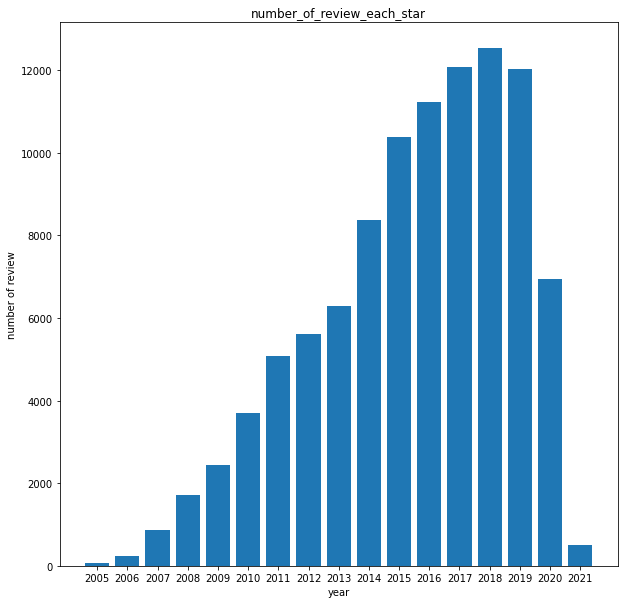

In [ ]:
#number of review each year
df['year'] = df['date'].map(lambda x:x.split('-')[0])
number_of_review_by_year = df.groupby('year').count().reset_index()[['year','review_id']].rename(columns={"year": "year", "review_id": "number_of_review"})

plt.figure(figsize=(10,10))

height = number_of_review_by_year['number_of_review']
#bars = ('A', 'B', 'C', 'D', 'E')
bars = number_of_review_by_year['year']
y_pos = bars#np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xlabel('year'),plt.ylabel('number of review'),plt.title('number_of_review_each_star')
# Show graphic
plt.show()


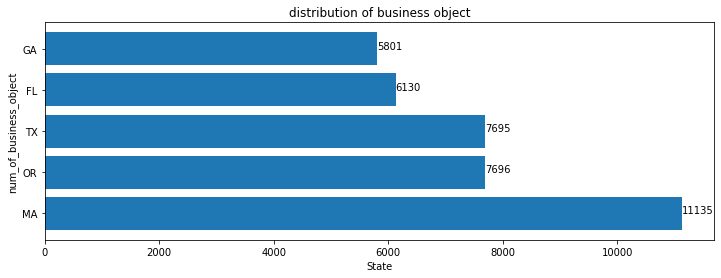

In [ ]:
temp = pd.DataFrame(df.groupby('state').business_id.nunique()).sort_values('business_id',ascending=False).reset_index().iloc[0:5,:].rename(columns={'business_id':'num_of_business'})
plt.figure(figsize=(12,4))
plt.barh(temp['state'], temp['num_of_business'])
plt.xlabel('State'),plt.ylabel('num_of_business_object'),plt.title('distribution of business object'),plt.xticks()
for index, value in enumerate(temp['num_of_business']):
    plt.text(value, index, str(value))
plt.show()


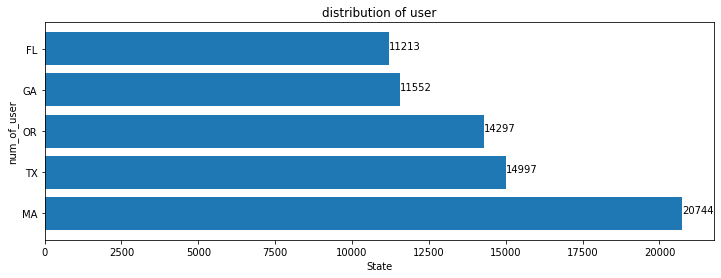

In [ ]:
temp = pd.DataFrame(df.groupby('state').user_id.nunique()).reset_index().sort_values('user_id',ascending=False).reset_index().iloc[0:5,:].rename(columns={'user_id':'num_of_user'})
plt.figure(figsize=(12,4))
plt.barh(temp['state'], temp['num_of_user'])
plt.xlabel('State'),plt.ylabel('num_of_user'),plt.title('distribution of user')
for index, value in enumerate(temp['num_of_user']):
    plt.text(value, index, str(value))
plt.show()

From the above picture we can see that MA, TX, OR,GA and FL are the top five states with the largest number of users in our dataset.

In [ ]:
df.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,address,city,state,postal_code,avg_stars,review_count,year
0,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4.0,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,Pho Van,8557 Research Blvd,Austin,TX,78758,4.0,364,2017
1,HgseF4yuseUvcrmCJXZliA,hcItyz0modqnxavedxxNBQ,xPo2OA5_wQgUEzAr-1o1Lg,5.0,0,0,0,best pizza on a busy street! my kids love it. ...,2008-12-03 20:41:59,Pizzapalooza,244 Needham St,Newton,MA,02464,3.5,42,2008
2,n2RYgJE9_t8NbON1A-BtPQ,hGNAQaGLZrTyMJKPs9CSrg,0TU09h0pr6Jfd2VBorDAbw,5.0,0,0,0,Amazing Service!!! Very professional & courteo...,2017-03-03 18:26:13,Service King Collision Orlando East,6215 E Colonial Dr,Orlando,FL,32807,4.5,13,2017


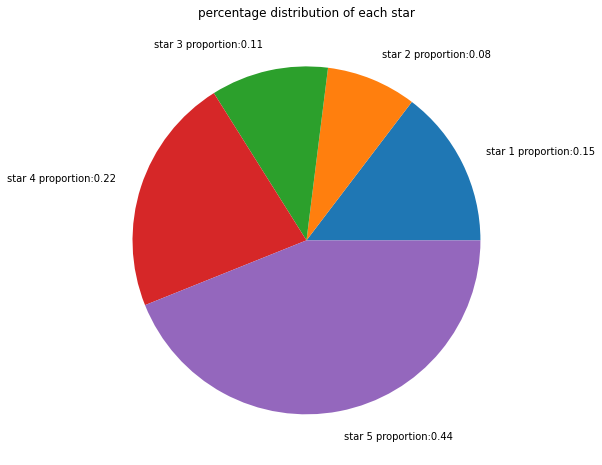

In [ ]:
#percentage_each_star in the dataset
plt.figure(figsize=(8,8))
length = len(df)
temp = df.groupby('stars').count().reset_index()
temp['percentage_each_star'] = temp['review_id']/length
percentage_each_star = temp[['stars','percentage_each_star']]
names = []
for index,value in enumerate(percentage_each_star['stars']):
  value = 'star '  + str(value)[0] + ' proportion:'+ str(round(percentage_each_star['percentage_each_star'][index],2))
  names.append(value)
plt.pie(percentage_each_star['percentage_each_star'],labels=names,labeldistance=1.15)
plt.title('percentage distribution of each star')
plt.show()

In [ ]:
# How many business objects in our dataset
print('number of business objects in our dataset: '+str(len(df.groupby('business_id').count())))
print('number of user in our dataset: '+str(len(df.groupby('user_id').count()))) 

number of business objects in our dataset: 47581
number of user in our dataset: 84681


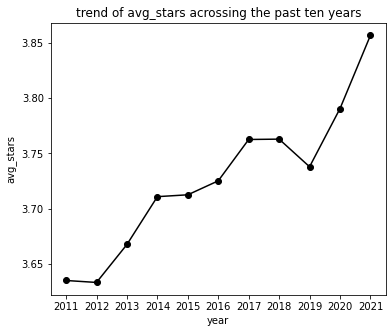

In [ ]:
# Let's take a look at the trend of star acrossing the past ten years
plt.figure(figsize=(6,5))
temp = df.groupby('year').mean().reset_index()[['year','stars']]
temp = temp[temp['year'].astype(int)>=2011]
plt.plot('year', 'stars','k', data=temp, linestyle='-', marker='o')
plt.title('trend of avg_stars acrossing the past ten years'),plt.xlabel('year'),plt.ylabel('avg_stars')
plt.show()

Now, let's take a look at the top five states'(top five with largest number of business objectᵟ) business object avg star density distribution. As each state has different number of business object in our dataset, so here we plot the density distribution of each state rather that quantity distribution


The five states are : MA:11135,OR:7696,TX:7695,FL:6130,GA:5801

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0, 0.5, 'Density')

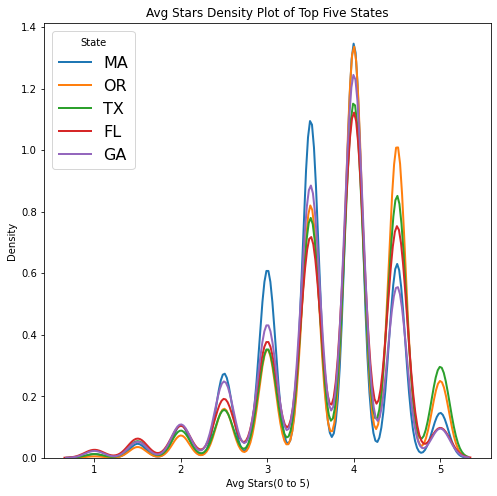

In [ ]:
five_state = df[df.state.isin(['MA','OR','TX','FL','GA'])][['state','avg_stars']]
import seaborn as sns
plt.figure(figsize=(8,8))
# List of five states to plot
states = ['MA','OR','TX','FL','GA']

# Iterate through the five states
for state in states:
    # Subset to the state
    subset = five_state[five_state['state'] == state]
    
    # Draw the density plot
    sns.distplot(subset['avg_stars'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = state)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'State')
plt.title('Avg Stars Density Plot of Top Five States')
plt.xlabel('Avg Stars(0 to 5)')
plt.ylabel('Density')

From the above density distribution we can see that state TX and OR has the larget percentage of positive rating business objects.

**Check how many rows contain languages except English**

In [ ]:
def is_contains_chinese(strs):#if text contain chinese, return true
    for _char in strs:
        if '\u4e00' <= _char <= '\u9fa5':
            return True
    return False

In [ ]:
df['is_contains_chinese'] = 'False'

In [ ]:
for index, value in enumerate(df['text']):
  result = is_contains_chinese(value)
  if result == True:
    df['is_contains_chinese'][index] = True
     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df.groupby('is_contains_chinese').count()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,address,city,state,postal_code,avg_stars,review_count,year
is_contains_chinese,,,,,,,,,,,,,,,,,
True,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
False,99936,99936,99936,99936,99936,99936,99936,99936,99936,99936,99936,99936,99936,99936,99936,99936,99936


In [ ]:
df[df['is_contains_chinese']==True]['text']

807      ディビジョンのローカルなフローズンヨーグルト屋さん。自前のキャラも作って、お店も広くて清潔。...
1075     Solid modern Shanghainese food. Quality ingred...
2218     店員のおねーちゃんがタイ人かな？とっても笑顔が素敵でした。お水もなくなったらすぐ入れに来てく...
2627     一月十四日我們四人叫了菜，其中一道油豆腐已經壞了，有告知服務人員，他說另外給我們一份油豆腐，...
3687     20180504 after my interview, I went downtown V...
                               ...                        
92533    没想到吃火锅会食物中毒！ 我和先生前天晚上10月11号晚5点后到达火锅店，以前也来过这家两次...
93090    Restaurant was rather packed and required some...
94282    小さな屋台である。希望を聞いて巻いてくれるが、スパムと野菜を巻いてもらって美味しかった。ソウ...
97901    We really like their fish bbq 烤鱼 and also real...
99499    Among all, Kung Fu (功夫茶 is probably the sounde...
Name: text, Length: 64, dtype: object

# Data Preprocessing

Remove all other languages except English


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   review_id            100000 non-null  object 
 1   user_id              100000 non-null  object 
 2   business_id          100000 non-null  object 
 3   stars                100000 non-null  float64
 4   useful               100000 non-null  int64  
 5   funny                100000 non-null  int64  
 6   cool                 100000 non-null  int64  
 7   text                 100000 non-null  object 
 8   date                 100000 non-null  object 
 9   name                 100000 non-null  object 
 10  address              100000 non-null  object 
 11  city                 100000 non-null  object 
 12  state                100000 non-null  object 
 13  postal_code          100000 non-null  object 
 14  avg_stars            100000 non-null  float64
 15  review_count      

In [ ]:
df = df[df['is_contains_chinese']!=True]#.reset_index(inplace=True,drop=True)
df.reset_index(inplace=True,drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99936 entries, 0 to 99935
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   review_id            99936 non-null  object 
 1   user_id              99936 non-null  object 
 2   business_id          99936 non-null  object 
 3   stars                99936 non-null  float64
 4   useful               99936 non-null  int64  
 5   funny                99936 non-null  int64  
 6   cool                 99936 non-null  int64  
 7   text                 99936 non-null  object 
 8   date                 99936 non-null  object 
 9   name                 99936 non-null  object 
 10  address              99936 non-null  object 
 11  city                 99936 non-null  object 
 12  state                99936 non-null  object 
 13  postal_code          99936 non-null  object 
 14  avg_stars            99936 non-null  float64
 15  review_count         99936 non-null 

# Data Preprocessing-Text Sentiment Analysis & NLP (Nature Language Preprocessing)

In [ ]:
df.head(1)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name,address,city,state,postal_code,avg_stars,review_count,year,is_contains_chinese
0,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4.0,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46,Pho Van,8557 Research Blvd,Austin,TX,78758,4.0,364,2017,False


In [ ]:
used_data = df[['stars','text','useful','review_id','user_id','business_id','date','year','city','state','avg_stars','review_count']]
used_data

,stars,text,useful,review_id,user_id,business_id,date,year,city,state,avg_stars,review_count
0,4.0,I think their rice dishes are way better than ...,0,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,2017-05-26 03:05:46,2017,Austin,TX,4.0,364
1,5.0,best pizza on a busy street! my kids love it. ...,0,HgseF4yuseUvcrmCJXZliA,hcItyz0modqnxavedxxNBQ,xPo2OA5_wQgUEzAr-1o1Lg,2008-12-03 20:41:59,2008,Newton,MA,3.5,42
2,5.0,Amazing Service!!! Very professional & courteo...,0,n2RYgJE9_t8NbON1A-BtPQ,hGNAQaGLZrTyMJKPs9CSrg,0TU09h0pr6Jfd2VBorDAbw,2017-03-03 18:26:13,2017,Orlando,FL,4.5,13
3,4.0,Blood Orange Creamsicle you guys! Do I need to...,0,Rw_has08oQcFkWElFJGYZg,p9TNT6pNKRuvBSzNf27JkQ,nVM8SLX5Yp3E6NNmL7tAPQ,2015-08-19 04:14:26,2015,Portland,OR,4.0,478
4,3.0,My roommate and I have lived here since 2014 a...,2,LEfte130UweUSmsYiASMXg,Qp5vlturOI4KD4zmqrts1A,8IGgRKegd0H287W66X0BOw,2017-06-06 20:32:05,2017,Atlanta,GA,1.5,22
...,...,...,...,...,...,...,...,...,...,...,...,...
99931,5.0,Love this place. If nothing I would've come ba...,2,jnS66zCeINp5uuwMiKjbAA,X05SmFFo05zYlrhMV5q72A,GrD-6IvFYMNdAGyFC_hXwA,2015-01-23 07:29:17,2015,Portland,OR,4.0,1224
99932,5.0,I have gone to Patrick several times over the ...,1,kD95BUcUw1nu_X8k-rTAGQ,z-JIChIfuRXWXGR9kpwEWw,-YrP1tUQyFcm-2OV-Y2Csw,2020-03-31 17:34:26,2020,Portland,OR,4.5,25
99933,5.0,Food is fresh and delicious! The only item I'v...,0,nBiUassIhtWHzijg0WVFLQ,uvRRbDtMcxwkaRmWvGJ5_w,dmkDZKPsK8lmwFuLiFQ0Zw,2020-12-20 23:20:07,2020,Portland,OR,4.5,24
99934,1.0,Serious integrity and predatory practices expe...,0,NwcNDTPeWiJXKJEOKnrz2A,MXLtlDuNzs59FQQSLhYiyA,2HcfBQ5uhDmeJ8_ctqZeEw,2021-01-22 16:11:31,2021,Autin,TX,4.0,10


In [ ]:
used_data['text'][0]

"I think their rice dishes are way better than their Pho's. Also I really like their sandwiches and spring rolls. I took a friend who haven't had viennese food ever. He absolutely love it."

In [ ]:
# removing everything except alphabets`
used_data['clean_text'] = used_data['text'].str.replace("[^a-zA-Z#]", " ")

# make all text lowercase
used_data['clean_text'] = used_data['clean_text'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
used_data['clean_text'][0]

'i think their rice dishes are way better than their pho s  also i really like their sandwiches and spring rolls  i took a friend who haven t had viennese food ever  he absolutely love it '

In [ ]:
# tokenization
used_data['clean_text'] = used_data['clean_text'].apply(lambda x: x.split())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(used_data['clean_text'][0])

['i', 'think', 'their', 'rice', 'dishes', 'are', 'way', 'better', 'than', 'their', 'pho', 's', 'also', 'i', 'really', 'like', 'their', 'sandwiches', 'and', 'spring', 'rolls', 'i', 'took', 'a', 'friend', 'who', 'haven', 't', 'had', 'viennese', 'food', 'ever', 'he', 'absolutely', 'love', 'it']


**Remove stop words**

In [ ]:
print(stopwords.words('english')[0:100])
stopword = list(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once']


In [ ]:
for index,value in enumerate(used_data['clean_text']):
  for L in value:
    if L in set(stopword):
      value.remove(L)
  used_data['clean_text'][index] = value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
used_data.head()

,stars,text,useful,review_id,user_id,business_id,date,year,city,state,avg_stars,review_count,clean_text
0,4.0,I think their rice dishes are way better than ...,0,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,2017-05-26 03:05:46,2017,Austin,TX,4.0,364,"[think, rice, dishes, way, better, pho, also, ..."
1,5.0,best pizza on a busy street! my kids love it. ...,0,HgseF4yuseUvcrmCJXZliA,hcItyz0modqnxavedxxNBQ,xPo2OA5_wQgUEzAr-1o1Lg,2008-12-03 20:41:59,2008,Newton,MA,3.5,42,"[best, pizza, busy, street, kids, love, been, ..."
2,5.0,Amazing Service!!! Very professional & courteo...,0,n2RYgJE9_t8NbON1A-BtPQ,hGNAQaGLZrTyMJKPs9CSrg,0TU09h0pr6Jfd2VBorDAbw,2017-03-03 18:26:13,2017,Orlando,FL,4.5,13,"[amazing, service, professional, courteous, st..."
3,4.0,Blood Orange Creamsicle you guys! Do I need to...,0,Rw_has08oQcFkWElFJGYZg,p9TNT6pNKRuvBSzNf27JkQ,nVM8SLX5Yp3E6NNmL7tAPQ,2015-08-19 04:14:26,2015,Portland,OR,4.0,478,"[blood, orange, creamsicle, guys, i, need, say..."
4,3.0,My roommate and I have lived here since 2014 a...,2,LEfte130UweUSmsYiASMXg,Qp5vlturOI4KD4zmqrts1A,8IGgRKegd0H287W66X0BOw,2017-06-06 20:32:05,2017,Atlanta,GA,1.5,22,"[roommate, lived, since, many, issues, many, r..."


**We now amplify the importance of each review based on the "useful" column**

In [ ]:
used_data['amplified_text'] = used_data['clean_text']*(used_data['useful'] + 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
used_data.head()

,stars,text,useful,review_id,user_id,business_id,date,year,city,state,avg_stars,review_count,clean_text,amplified_text
0,4.0,I think their rice dishes are way better than ...,0,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,2017-05-26 03:05:46,2017,Austin,TX,4.0,364,"[think, rice, dishes, way, better, pho, also, ...","[think, rice, dishes, way, better, pho, also, ..."
1,5.0,best pizza on a busy street! my kids love it. ...,0,HgseF4yuseUvcrmCJXZliA,hcItyz0modqnxavedxxNBQ,xPo2OA5_wQgUEzAr-1o1Lg,2008-12-03 20:41:59,2008,Newton,MA,3.5,42,"[best, pizza, busy, street, kids, love, been, ...","[best, pizza, busy, street, kids, love, been, ..."
2,5.0,Amazing Service!!! Very professional & courteo...,0,n2RYgJE9_t8NbON1A-BtPQ,hGNAQaGLZrTyMJKPs9CSrg,0TU09h0pr6Jfd2VBorDAbw,2017-03-03 18:26:13,2017,Orlando,FL,4.5,13,"[amazing, service, professional, courteous, st...","[amazing, service, professional, courteous, st..."
3,4.0,Blood Orange Creamsicle you guys! Do I need to...,0,Rw_has08oQcFkWElFJGYZg,p9TNT6pNKRuvBSzNf27JkQ,nVM8SLX5Yp3E6NNmL7tAPQ,2015-08-19 04:14:26,2015,Portland,OR,4.0,478,"[blood, orange, creamsicle, guys, i, need, say...","[blood, orange, creamsicle, guys, i, need, say..."
4,3.0,My roommate and I have lived here since 2014 a...,2,LEfte130UweUSmsYiASMXg,Qp5vlturOI4KD4zmqrts1A,8IGgRKegd0H287W66X0BOw,2017-06-06 20:32:05,2017,Atlanta,GA,1.5,22,"[roommate, lived, since, many, issues, many, r...","[roommate, lived, since, many, issues, many, r..."


**Calculate sentiment score for each review**

In [ ]:
# how sia.polarity_scores works 
sia.polarity_scores('what a great movie')

{'compound': 0.6249, 'neg': 0.0, 'neu': 0.328, 'pos': 0.672}

In [ ]:
# This cell of code take some time to run
scores = {}
for index,value in enumerate(used_data['amplified_text']):
  value = " ".join(value)
  score = sia.polarity_scores(value)
  if 'pos' not in scores.keys():
    scores['pos'] = [score['pos']]
  else:
    scores['pos'].append(score['pos'])
  if 'neg' not in scores.keys():
    scores['neg'] = [score['neg']]
  else:
    scores['neg'].append(score['neg'])
  if 'neu' not in scores.keys():
    scores['neu'] = [score['neu']]
  else:
    scores['neu'].append(score['neu'])
  if 'compound' not in scores.keys():
    scores['compound'] = [score['compound']]
  else:
    scores['compound'].append(score['compound'])

In [ ]:
# merge used dataset with score dataframe
# Note: Only run this cell once
scores_dataframe = pd.DataFrame(scores)
used_data = pd.concat([used_data,scores_dataframe],axis=1)

In [ ]:
used_data.to_csv('used_data.csv')
files.download('used_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7076395583173265


Text(0.5, 1.0, 'distribution of compound score')

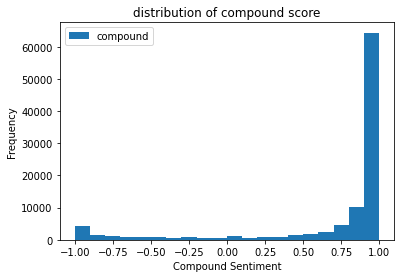

In [ ]:
ax = used_data['compound'].plot.hist(stacked=True,bins=20)
print(used_data['compound'].mean())
ax.legend()
ax.set_xlabel("Compound Sentiment")
ax.set_title('distribution of compound score')

We can see most posts are above zero and most of the compound are more than 0.5, which yields a positive average sentiment score. This is a good sign for the business object at yelp platform.

Now, let's take a look at the sentiment score of different states


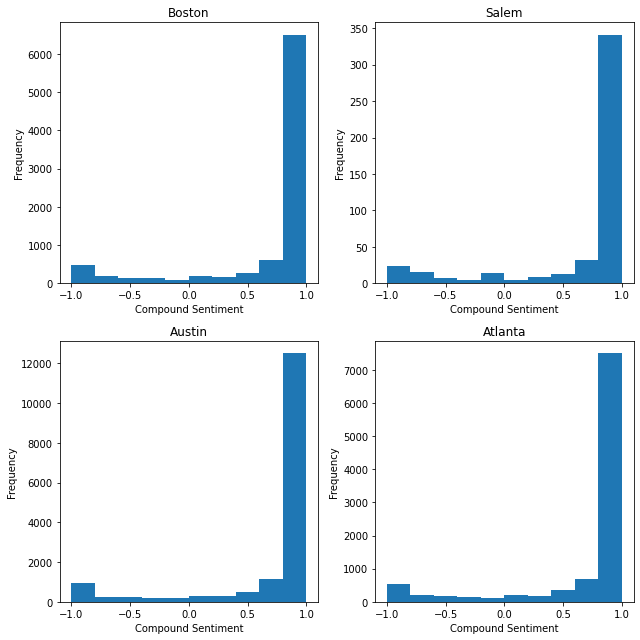

In [ ]:
plt.figure(figsize=(9,9))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)
axs = [ax1,ax2,ax3,ax4]
#plt.distplot()
# We visualize those four state's Capital compound score 
#state = ['MA','OR','TX','GA']
Capital = ['Boston','Salem','Austin','Atlanta']
#full_name = ['Massachusetts','Oregon','Texas','Georgia']
for index in range(len(axs)):
  #ax = axs[index].plot.hist(stacked=True,bins=20,ax=axs[index])
  used_data[used_data['city'] == Capital[index]]['compound'].plot.hist(stacked=True,bins=10,ax=axs[index])
  #axs[index].legend()
  axs[index].set_title(Capital[index])
  axs[index].set_xlabel("Compound Sentiment")
plt.tight_layout()
#states = ['MA','OR','TX','FL']


In [ ]:
used_data[used_data['city']=='Atlanta']#.groupby('city').count().reset_index()['city'].values)

,stars,text,useful,review_id,user_id,business_id,date,year,city,state,avg_stars,review_count,clean_text,amplified_text,pos,neg,neu,compound
4,3.0,My roommate and I have lived here since 2014 a...,2,LEfte130UweUSmsYiASMXg,Qp5vlturOI4KD4zmqrts1A,8IGgRKegd0H287W66X0BOw,2017-06-06 20:32:05,2017,Atlanta,GA,1.5,22,"[roommate, lived, since, many, issues, many, r...","[roommate, lived, since, many, issues, many, r...",0.140,0.079,0.781,0.9939
10,4.0,This is a fairly newer QuikTrip. Located conve...,0,fGLWFZ8kRhLKKYq456WkSQ,iSqAA0keruU-ZZro7jW0zQ,gpmxiKoupdrZHNHxjpmeDA,2016-01-17 05:48:27,2016,Atlanta,GA,4.0,18,"[is, fairly, newer, quiktrip, located, conveni...","[is, fairly, newer, quiktrip, located, conveni...",0.278,0.037,0.686,0.9246
13,5.0,Love love love Gilbert's. It's such an exotic...,2,iV01Gk1o8R8J24H8kiKExw,AyRa2eaaD2EOkSxdkSrNEA,oagCfgYKmsr6flUYXaziKQ,2006-04-19 20:06:02,2006,Atlanta,GA,3.5,97,"[love, love, love, gilbert, such, exotic, litt...","[love, love, love, gilbert, such, exotic, litt...",0.646,0.025,0.329,0.9997
14,5.0,"I haven't made it to a yoga class, yet, but I ...",0,uVEjMF07KHA4ywzlWnMEqw,6OC3Yenu3YGN0D4i-6-1Jw,Ife_IgrP3PF0USBQwkxMWA,2017-10-11 01:35:12,2017,Atlanta,GA,5.0,8,"[haven, made, yoga, class, yet, do, yoga, ther...","[haven, made, yoga, class, yet, do, yoga, ther...",0.236,0.000,0.764,0.8618
15,5.0,What a relief to have a great meal in an airpo...,0,a-fU1uKLhDxONr2igR1c_Q,tDmNzJSzXDnwHHtUvU8kjQ,wgvmFqXQYRmMvC6V--ISaA,2016-02-12 00:58:49,2016,Atlanta,GA,4.5,1067,"[relief, have, a, great, meal, an, airport, sa...","[relief, have, a, great, meal, an, airport, sa...",0.548,0.000,0.452,0.8979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99866,3.0,I like that that they have a variety of donut ...,1,hZguuphLT_314SAoXCn_pw,lHXnu8hjfCQzltV3jYVB7Q,iG8DnZCnKHH_KYC8pG14NQ,2020-03-27 13:56:08,2020,Atlanta,GA,4.0,1142,"[like, that, have, variety, donut, options, ev...","[like, that, have, variety, donut, options, ev...",0.136,0.019,0.845,0.9637
99882,5.0,Been going here for a while and it's the best....,0,kCiZgyjKA6Gx2jmCB23fBw,NnRApFoGZF9zGnJwnegtYw,58iTFlb0WR00OCFe2HQzqQ,2020-08-10 15:26:52,2020,Atlanta,GA,5.0,66,"[going, for, while, it, the, best, make, feel,...","[going, for, while, it, the, best, make, feel,...",0.544,0.000,0.456,0.9360
99888,2.0,"I like this spot,food wise, but one lady who m...",3,9r2x6b1Hwo-lpjl6ZY9Ymw,y958BADdCxj6J23UwqNHyQ,_qkEX2cEPXuGmpa_bunJ2Q,2019-09-07 22:07:57,2019,Atlanta,GA,4.0,131,"[like, spot, food, wise, one, lady, may, owner...","[like, spot, food, wise, one, lady, may, owner...",0.161,0.102,0.737,0.9891
99904,5.0,I ordered a family meal to be delivered for a ...,0,IKRr2MGvA31h-1qLoj1T9A,zMWz04DAqRUkrzDZMf4tmg,crq0Y_sVNe-CddE6nj-yjg,2020-08-05 23:45:11,2020,Atlanta,GA,4.0,1101,"[ordered, family, meal, be, delivered, co, wor...","[ordered, family, meal, be, delivered, co, wor...",0.206,0.063,0.731,0.8316


**We segment sentiment based on the following rules**

stars 1 & 2 mean negative 

stars 3 means neu neutrial

stars 4 & 5 mean positive 




In [ ]:
used_data
used_data['sentiment'] = 'na'
for index, value in enumerate(used_data['stars']):
  if value == 1 or value == 2:
    used_data['sentiment'][index] = 'negative'
  elif value == 3:
    used_data['sentiment'][index] = 'neutral'
  elif value == 4 or value == 5:
    used_data['sentiment'][index] = 'positive'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
used_data

,stars,text,useful,review_id,user_id,business_id,date,year,city,state,avg_stars,review_count,clean_text,amplified_text,pos,neg,neu,compound,sentiment
0,4.0,I think their rice dishes are way better than ...,0,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,2017-05-26 03:05:46,2017,Austin,TX,4.0,364,"[think, rice, dishes, way, better, pho, also, ...","[think, rice, dishes, way, better, pho, also, ...",0.426,0.000,0.574,0.9244,positive
1,5.0,best pizza on a busy street! my kids love it. ...,0,HgseF4yuseUvcrmCJXZliA,hcItyz0modqnxavedxxNBQ,xPo2OA5_wQgUEzAr-1o1Lg,2008-12-03 20:41:59,2008,Newton,MA,3.5,42,"[best, pizza, busy, street, kids, love, been, ...","[best, pizza, busy, street, kids, love, been, ...",0.468,0.000,0.532,0.9819,positive
2,5.0,Amazing Service!!! Very professional & courteo...,0,n2RYgJE9_t8NbON1A-BtPQ,hGNAQaGLZrTyMJKPs9CSrg,0TU09h0pr6Jfd2VBorDAbw,2017-03-03 18:26:13,2017,Orlando,FL,4.5,13,"[amazing, service, professional, courteous, st...","[amazing, service, professional, courteous, st...",0.497,0.000,0.503,0.9828,positive
3,4.0,Blood Orange Creamsicle you guys! Do I need to...,0,Rw_has08oQcFkWElFJGYZg,p9TNT6pNKRuvBSzNf27JkQ,nVM8SLX5Yp3E6NNmL7tAPQ,2015-08-19 04:14:26,2015,Portland,OR,4.0,478,"[blood, orange, creamsicle, guys, i, need, say...","[blood, orange, creamsicle, guys, i, need, say...",0.205,0.049,0.746,0.9403,positive
4,3.0,My roommate and I have lived here since 2014 a...,2,LEfte130UweUSmsYiASMXg,Qp5vlturOI4KD4zmqrts1A,8IGgRKegd0H287W66X0BOw,2017-06-06 20:32:05,2017,Atlanta,GA,1.5,22,"[roommate, lived, since, many, issues, many, r...","[roommate, lived, since, many, issues, many, r...",0.140,0.079,0.781,0.9939,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99931,5.0,Love this place. If nothing I would've come ba...,2,jnS66zCeINp5uuwMiKjbAA,X05SmFFo05zYlrhMV5q72A,GrD-6IvFYMNdAGyFC_hXwA,2015-01-23 07:29:17,2015,Portland,OR,4.0,1224,"[love, place, nothing, would, come, back, cass...","[love, place, nothing, would, come, back, cass...",0.410,0.000,0.590,0.9972,positive
99932,5.0,I have gone to Patrick several times over the ...,1,kD95BUcUw1nu_X8k-rTAGQ,z-JIChIfuRXWXGR9kpwEWw,-YrP1tUQyFcm-2OV-Y2Csw,2020-03-31 17:34:26,2020,Portland,OR,4.5,25,"[gone, patrick, several, times, years, we, pro...","[gone, patrick, several, times, years, we, pro...",0.312,0.032,0.656,0.9880,positive
99933,5.0,Food is fresh and delicious! The only item I'v...,0,nBiUassIhtWHzijg0WVFLQ,uvRRbDtMcxwkaRmWvGJ5_w,dmkDZKPsK8lmwFuLiFQ0Zw,2020-12-20 23:20:07,2020,Portland,OR,4.5,24,"[food, fresh, delicious, only, item, ve, tried...","[food, fresh, delicious, only, item, ve, tried...",0.272,0.129,0.599,0.7351,positive
99934,1.0,Serious integrity and predatory practices expe...,0,NwcNDTPeWiJXKJEOKnrz2A,MXLtlDuNzs59FQQSLhYiyA,2HcfBQ5uhDmeJ8_ctqZeEw,2021-01-22 16:11:31,2021,Autin,TX,4.0,10,"[serious, integrity, predatory, practices, exp...","[serious, integrity, predatory, practices, exp...",0.136,0.113,0.751,0.5584,negative


In [ ]:
for index,value in enumerate(used_data['amplified_text']):
  used_data['amplified_text'][index] = " ".join(value)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
used_data

,stars,text,useful,review_id,user_id,business_id,date,year,city,state,avg_stars,review_count,clean_text,amplified_text,pos,neg,neu,compound,sentiment
0,4.0,I think their rice dishes are way better than ...,0,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,2017-05-26 03:05:46,2017,Austin,TX,4.0,364,"[think, rice, dishes, way, better, pho, also, ...",think rice dishes way better pho also really l...,0.426,0.000,0.574,0.9244,positive
1,5.0,best pizza on a busy street! my kids love it. ...,0,HgseF4yuseUvcrmCJXZliA,hcItyz0modqnxavedxxNBQ,xPo2OA5_wQgUEzAr-1o1Lg,2008-12-03 20:41:59,2008,Newton,MA,3.5,42,"[best, pizza, busy, street, kids, love, been, ...",best pizza busy street kids love been recommen...,0.468,0.000,0.532,0.9819,positive
2,5.0,Amazing Service!!! Very professional & courteo...,0,n2RYgJE9_t8NbON1A-BtPQ,hGNAQaGLZrTyMJKPs9CSrg,0TU09h0pr6Jfd2VBorDAbw,2017-03-03 18:26:13,2017,Orlando,FL,4.5,13,"[amazing, service, professional, courteous, st...",amazing service professional courteous staff b...,0.497,0.000,0.503,0.9828,positive
3,4.0,Blood Orange Creamsicle you guys! Do I need to...,0,Rw_has08oQcFkWElFJGYZg,p9TNT6pNKRuvBSzNf27JkQ,nVM8SLX5Yp3E6NNmL7tAPQ,2015-08-19 04:14:26,2015,Portland,OR,4.0,478,"[blood, orange, creamsicle, guys, i, need, say...",blood orange creamsicle guys i need say anythi...,0.205,0.049,0.746,0.9403,positive
4,3.0,My roommate and I have lived here since 2014 a...,2,LEfte130UweUSmsYiASMXg,Qp5vlturOI4KD4zmqrts1A,8IGgRKegd0H287W66X0BOw,2017-06-06 20:32:05,2017,Atlanta,GA,1.5,22,"[roommate, lived, since, many, issues, many, r...",roommate lived since many issues many reviewer...,0.140,0.079,0.781,0.9939,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99931,5.0,Love this place. If nothing I would've come ba...,2,jnS66zCeINp5uuwMiKjbAA,X05SmFFo05zYlrhMV5q72A,GrD-6IvFYMNdAGyFC_hXwA,2015-01-23 07:29:17,2015,Portland,OR,4.0,1224,"[love, place, nothing, would, come, back, cass...",love place nothing would come back cassoulet g...,0.410,0.000,0.590,0.9972,positive
99932,5.0,I have gone to Patrick several times over the ...,1,kD95BUcUw1nu_X8k-rTAGQ,z-JIChIfuRXWXGR9kpwEWw,-YrP1tUQyFcm-2OV-Y2Csw,2020-03-31 17:34:26,2020,Portland,OR,4.5,25,"[gone, patrick, several, times, years, we, pro...",gone patrick several times years we properties...,0.312,0.032,0.656,0.9880,positive
99933,5.0,Food is fresh and delicious! The only item I'v...,0,nBiUassIhtWHzijg0WVFLQ,uvRRbDtMcxwkaRmWvGJ5_w,dmkDZKPsK8lmwFuLiFQ0Zw,2020-12-20 23:20:07,2020,Portland,OR,4.5,24,"[food, fresh, delicious, only, item, ve, tried...",food fresh delicious only item ve tried i disl...,0.272,0.129,0.599,0.7351,positive
99934,1.0,Serious integrity and predatory practices expe...,0,NwcNDTPeWiJXKJEOKnrz2A,MXLtlDuNzs59FQQSLhYiyA,2HcfBQ5uhDmeJ8_ctqZeEw,2021-01-22 16:11:31,2021,Autin,TX,4.0,10,"[serious, integrity, predatory, practices, exp...",serious integrity predatory practices experien...,0.136,0.113,0.751,0.5584,negative


In [ ]:
used_data = pd.read_csv('used_data.csv').drop('Unnamed: 0',axis=1)
used_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99936 entries, 0 to 99935
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stars           99936 non-null  float64
 1   text            99936 non-null  object 
 2   useful          99936 non-null  int64  
 3   review_id       99936 non-null  object 
 4   user_id         99936 non-null  object 
 5   business_id     99936 non-null  object 
 6   date            99936 non-null  object 
 7   year            99936 non-null  int64  
 8   city            99936 non-null  object 
 9   state           99936 non-null  object 
 10  avg_stars       99936 non-null  float64
 11  review_count    99936 non-null  int64  
 12  clean_text      99936 non-null  object 
 13  amplified_text  99936 non-null  object 
 14  pos             99936 non-null  float64
 15  neg             99936 non-null  float64
 16  neu             99936 non-null  float64
 17  compound        99936 non-null 

In [ ]:
used_data.head(1)

,stars,text,useful,review_id,user_id,business_id,date,year,city,state,avg_stars,review_count,clean_text,amplified_text,pos,neg,neu,compound,sentiment,neu_sentiment
0,4.0,I think their rice dishes are way better than ...,0,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,2017-05-26 03:05:46,2017,Austin,TX,4.0,364,"['think', 'rice', 'dishes', 'way', 'better', '...",think rice dishes way better pho also really l...,0.426,0.0,0.574,0.9244,positive,not_neu


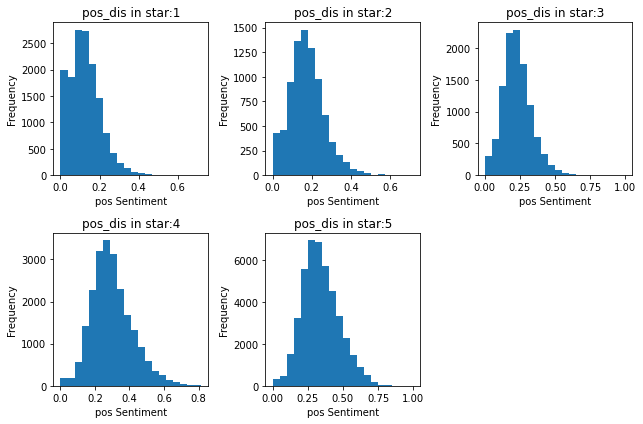

In [ ]:
plt.figure(figsize=(9,6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
axs = [ax1,ax2,ax3,ax4,ax5]
Stars = [1,2,3,4,5]
for index in range(len(axs)):
  used_data[used_data['stars'] == Stars[index]]['pos'].plot.hist(stacked=True,bins=20,ax=axs[index])
  axs[index].set_title('pos_dis in star:'+str(Stars[index]))
  axs[index].set_xlabel("pos Sentiment")
plt.tight_layout()

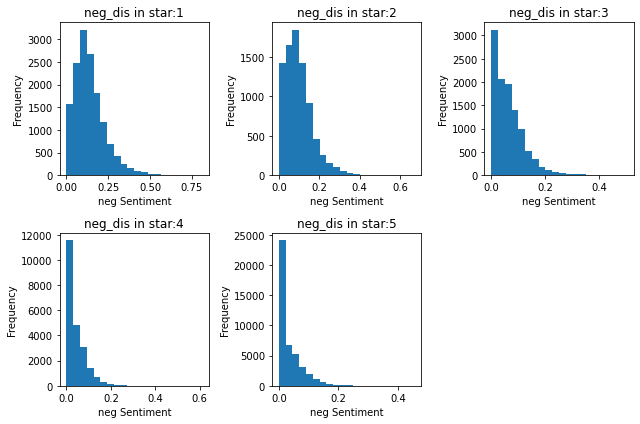

In [ ]:
plt.figure(figsize=(9,6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
axs = [ax1,ax2,ax3,ax4,ax5]
Stars = [1,2,3,4,5]
for index in range(len(axs)):
  used_data[used_data['stars'] == Stars[index]]['neg'].plot.hist(stacked=True,bins=20,ax=axs[index])
  axs[index].set_title('neg_dis in star:'+str(Stars[index]))
  axs[index].set_xlabel("neg Sentiment")
plt.tight_layout()

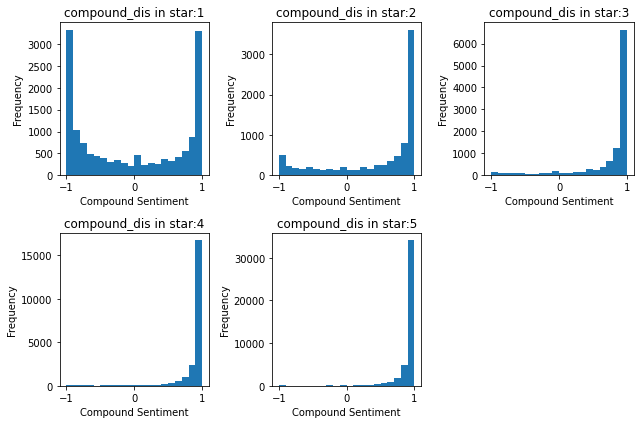

In [ ]:
plt.figure(figsize=(9,6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
axs = [ax1,ax2,ax3,ax4,ax5]
Stars = [1,2,3,4,5]
for index in range(len(axs)):
  used_data[used_data['stars'] == Stars[index]]['compound'].plot.hist(stacked=True,bins=20,ax=axs[index])
  axs[index].set_title('compound_dis in star:'+str(Stars[index]))
  axs[index].set_xlabel("Compound Sentiment")
plt.tight_layout()

In [ ]:
used_data.head()

,stars,text,useful,review_id,user_id,business_id,date,year,city,state,avg_stars,review_count,clean_text,amplified_text,pos,neg,neu,compound,sentiment,neu_sentiment
0,4.0,I think their rice dishes are way better than ...,0,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,2017-05-26 03:05:46,2017,Austin,TX,4.0,364,"['think', 'rice', 'dishes', 'way', 'better', '...",think rice dishes way better pho also really l...,0.426,0.000,0.574,0.9244,positive,not_neu
1,5.0,best pizza on a busy street! my kids love it. ...,0,HgseF4yuseUvcrmCJXZliA,hcItyz0modqnxavedxxNBQ,xPo2OA5_wQgUEzAr-1o1Lg,2008-12-03 20:41:59,2008,Newton,MA,3.5,42,"['best', 'pizza', 'busy', 'street', 'kids', 'l...",best pizza busy street kids love been recommen...,0.468,0.000,0.532,0.9819,positive,not_neu
2,5.0,Amazing Service!!! Very professional & courteo...,0,n2RYgJE9_t8NbON1A-BtPQ,hGNAQaGLZrTyMJKPs9CSrg,0TU09h0pr6Jfd2VBorDAbw,2017-03-03 18:26:13,2017,Orlando,FL,4.5,13,"['amazing', 'service', 'professional', 'courte...",amazing service professional courteous staff b...,0.497,0.000,0.503,0.9828,positive,not_neu
3,4.0,Blood Orange Creamsicle you guys! Do I need to...,0,Rw_has08oQcFkWElFJGYZg,p9TNT6pNKRuvBSzNf27JkQ,nVM8SLX5Yp3E6NNmL7tAPQ,2015-08-19 04:14:26,2015,Portland,OR,4.0,478,"['blood', 'orange', 'creamsicle', 'guys', 'i',...",blood orange creamsicle guys i need say anythi...,0.205,0.049,0.746,0.9403,positive,not_neu
4,3.0,My roommate and I have lived here since 2014 a...,2,LEfte130UweUSmsYiASMXg,Qp5vlturOI4KD4zmqrts1A,8IGgRKegd0H287W66X0BOw,2017-06-06 20:32:05,2017,Atlanta,GA,1.5,22,"['roommate', 'lived', 'since', 'many', 'issues...",roommate lived since many issues many reviewer...,0.140,0.079,0.781,0.9939,neutral,neu_pos


#Calculate Quantile for later neutral comment segmentation

Definition of lower outlier and upper outlier ✈

lower outlier is Q1 - 1.5*(Q3-Q1)

upper outlier is Q3 + 1.5*(Q3-Q1)

In [ ]:
Q1 = used_data.groupby('sentiment').quantile(0.25).reset_index()[['sentiment','compound']].rename(columns={'sentiment':'sentiment','compound':'Q1_compound'})
Q2 = used_data.groupby('sentiment').quantile(0.5).reset_index()[['sentiment','compound']].rename(columns={'sentiment':'sentiment','compound':'Q2_compound'})[['Q2_compound']]
Q3 = used_data.groupby('sentiment').quantile(0.75).reset_index()[['sentiment','compound']].rename(columns={'sentiment':'sentiment','compound':'Q3_compound'})[['Q3_compound']]

quartile = pd.concat([Q1,Q2,Q3],axis=1)
quartile

,sentiment,Q1_compound,Q2_compound,Q3_compound
0,negative,-0.7351,0.4019,0.9393
1,neutral,0.7574,0.9459,0.9896
2,positive,0.9081,0.9689,0.9924


**Here we set a sign for neutral comment(3 stars)**

*   Any 3 stars comment with compound score <= Q1 will be labelled as neu_neg

*   Any 3 stars comment with compound score > Q3 will be labelled as neu_pos

*   Any 3 stars comment with compound between Q1 and Q3 will be labelled as neu_nue






In [ ]:
used_data['neu_sentiment'] = 'not_neu'
# We set Q1 and Q3 as threshold for whether the neutral comment is more negative or more positive 
for index, value in enumerate(used_data['sentiment']):
  if value == 'neutral' and used_data['compound'][index] <= quartile.loc[1,'Q1_compound']:
    used_data.loc[index,'neu_sentiment'] = 'neu_neg'
  elif value == 'neutral' and used_data['compound'][index] > quartile.loc[1,'Q3_compound']:
    used_data.loc[index,'neu_sentiment'] = 'neu_pos'
  elif value == 'neutral' and used_data['compound'][index] > quartile.loc[1,'Q1_compound'] and used_data['compound'][index] <= quartile.loc[1,'Q3_compound']:
    used_data.loc[index,'neu_sentiment'] = 'neu_neu'

In [ ]:
used_data.groupby('neu_sentiment').count()

,stars,text,useful,review_id,user_id,business_id,date,year,city,state,avg_stars,review_count,clean_text,amplified_text,pos,neg,neu,compound,sentiment
neu_sentiment,,,,,,,,,,,,,,,,,,,
neu_neg,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728
neu_neu,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457
neu_pos,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721
not_neu,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030


In [ ]:
used_data[(used_data['stars'] == 1) | (used_data['stars'] == 2)].count()

stars             23012
text              23012
useful            23012
review_id         23012
user_id           23012
business_id       23012
date              23012
year              23012
city              23012
state             23012
avg_stars         23012
review_count      23012
clean_text        23012
amplified_text    23012
pos               23012
neg               23012
neu               23012
compound          23012
sentiment         23012
neu_sentiment     23012
dtype: int64

# Topic Modeling


**First let's try to create a customized stopwords list**

In [ ]:
my_stopwords = ['good','great','bad','recommend','like','pizza','chicken','horrible','better','worst','worse',
                'really','best','amazing','excellent','really','nice','love','highly','pretty']
# stopword from spacy
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
# stopword from nltk
stopword_forTfidfVectorizer = list(stopwords.words('english')) + list(en_stop) + my_stopwords
print(len(stopword_forTfidfVectorizer))

525


In [ ]:
len(my_stopwords)

20

In [ ]:
len(list(stopwords.words('english')))

179

In [ ]:
len(list(en_stop))

326

In [ ]:
# import tools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
# TfidfVectorizer 
def getTopics(df, topicsNum):
    re = ''
    vectorizer = TfidfVectorizer(stop_words=stopword_forTfidfVectorizer, 
                                 #stop_words='english',
                                 max_features= 500 # keep top 500 terms 
                                 ,max_df = 0.35
                                 ,min_df = 0.05
                                 )
    X = vectorizer.fit_transform(df['amplified_text'])
    
    print(X.shape)
    svd_model = TruncatedSVD(n_components=topicsNum, algorithm='randomized', n_iter=100, random_state=122)
    svd_model.fit(X)
    
    terms = vectorizer.get_feature_names() 
    print('components_ output shape '+str(svd_model.components_.shape))
    print(svd_model.components_)

    for i, comp in enumerate(svd_model.components_):
        terms_comp = zip(terms, comp)
        # 7 represent the number of key words we want to keep in each topic
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
        string = "Topic "+str(i+1)+": "
        for t in sorted_terms:
            string = string + t[0] + ' '
            re = re + t[0] + ' '
        print(string)
        
    return re

**First lets find out why customers give negative reviews**

In [ ]:
print('negative topics')
topic = getTopics(used_data[(used_data['stars'] == 1) | (used_data['stars'] == 2)], topicsNum=10)

negative topics
(23012, 133)
components_ output shape (10, 133)
[[ 0.05375653  0.05193305  0.04573669 ...  0.0534104   0.05281103
   0.05644966]
 [-0.01670479 -0.00139009 -0.00413807 ...  0.01598738 -0.01965294
  -0.04217895]
 [ 0.02186757  0.03559468 -0.01549099 ...  0.02746867 -0.0054664
   0.00959735]
 ...
 [ 0.01222876 -0.01604516 -0.04206287 ...  0.03657012  0.05360057
   0.04330051]
 [ 0.00607374  0.00245995  0.01883561 ...  0.03427292 -0.03636514
  -0.00046736]
 [ 0.01498355  0.03766232 -0.00737106 ...  0.04572849  0.01750786
   0.02769219]]
Topic 1: food place service time order got ordered said told minutes 
Topic 2: food ordered restaurant place eat sauce tasted taste menu quality 
Topic 3: place got people think sauce try way taste tasted went 
Topic 4: service place customer rude staff terrible people poor store business 
Topic 5: car food price told company said day pay new money 
Topic 6: car order place service ordered minutes got took customer came 
Topic 7: time car or

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


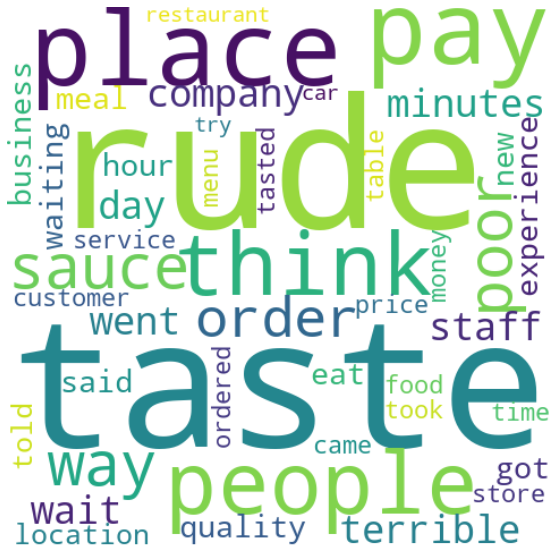

In [ ]:
topics = set(topic.split(' '))
text = ''
for value in topics:
  text = text + ' ' + value
text
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0,background_color="white").generate(text)
plt.figure(figsize=(10,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

**Now let's find out why customer give positive reviews**

In [ ]:
print('positive topics')
topic = getTopics(used_data[(used_data['stars'] == 4) | (used_data['stars'] == 5)], topicsNum=10)

positive topics
Topic 1: food place service time delicious friendly definitely staff got try 
Topic 2: food service delicious restaurant atmosphere fresh menu tasty drinks meal 
Topic 3: place favorite eat try delicious food fresh selection drinks want 
Topic 4: friendly staff service place clean helpful super location awesome work 
Topic 5: service place time work experience took new went years price 
Topic 6: food time work people years staff experience going know feel 
Topic 7: time delicious place friendly definitely staff long fresh wait took 
Topic 8: got definitely awesome food experience went super came loved place 
Topic 9: delicious work experience new years day going home feel food 
Topic 10: definitely experience awesome come restaurant try worth menu atmosphere area 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


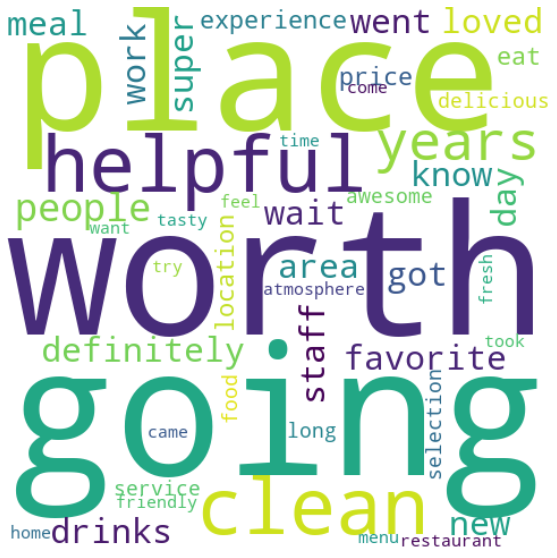

In [ ]:
topics = set(topic.split(' '))
text = ''
for value in topics:
  text = text + ' ' + value
text
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0,background_color="white").generate(text)
plt.figure(figsize=(10,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

**now let's find out what we can do with 3 stars reviews**

In [ ]:
used_data.groupby('neu_sentiment').count()

,stars,text,useful,review_id,user_id,business_id,date,year,city,state,avg_stars,review_count,clean_text,amplified_text,pos,neg,neu,compound,sentiment
neu_sentiment,,,,,,,,,,,,,,,,,,,
neu_neg,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728
neu_neu,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457
neu_pos,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721
not_neu,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030,89030


**3 stars but with low compound score(means neu_neg)**

In [ ]:
print('3 stars negative topics')
topic = getTopics(used_data[used_data['neu_sentiment']=='neu_neg'], topicsNum=10)

3 stars negative topics
Topic 1: place service time order got ordered decent little went come 
Topic 2: place prices lot want staff area little small bar price 
Topic 3: service place ok average quality bar prices need small decent 
Topic 4: time place service wait took long minutes times went know 
Topic 5: ordered order got cheese came place minutes took menu average 
Topic 6: decent price got time quality staff lunch small location experience 
Topic 7: staff bar order average area need wait location people know 
Topic 8: decent bar order time drinks restaurant menu lunch night small 
Topic 9: order ok staff location decent times lot wait place know 
Topic 10: average ordered menu staff time taste lunch location bit disappointed 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


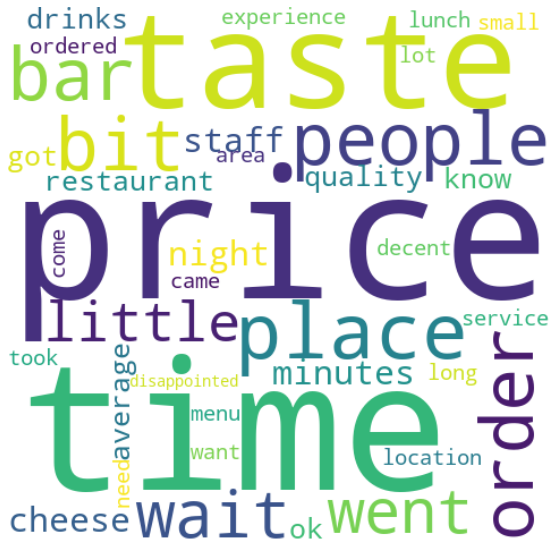

In [ ]:
topics = set(topic.split(' '))
text = ''
for value in topics:
  text = text + ' ' + value
text
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0,background_color="white").generate(text)
plt.figure(figsize=(10,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

**3 stars with high compound score means(neu_pos)**

In [ ]:
print('3 stars positive topics')
topic = getTopics(used_data[used_data['neu_sentiment']=='neu_pos'], topicsNum=10)

3 stars positive topics
Topic 1: got little ordered restaurant menu came order people think try 
Topic 2: sauce ordered fried pork rice restaurant dish salad flavor burger 
Topic 3: bar burger drink beer drinks hour happy fries night table 
Topic 4: burger fries sandwich beer store cheese selection lunch bit decent 
Topic 5: bar happy beer restaurant hour menu selection rice drinks location 
Topic 6: room restaurant burger staff coffee friendly breakfast lunch parking location 
Topic 7: coffee sandwich happy hour breakfast cream cheese definitely got sweet 
Topic 8: happy hour price burger experience stars prices meal lunch half 
Topic 9: room sauce pork night little got bit felt rice fried 
Topic 10: salad sandwich bread room cheese lunch little steak meat wine 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


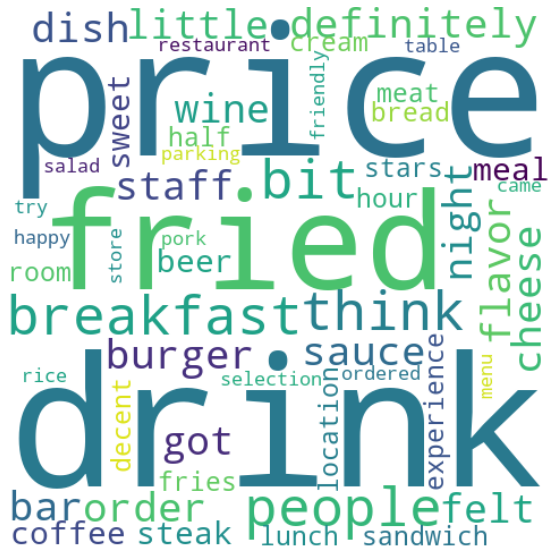

In [ ]:
topics = set(topic.split(' '))
text = ''
for value in topics:
  text = text + ' ' + value
text
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0,background_color="white").generate(text)
plt.figure(figsize=(10,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# we can also do this on a specific business object

In [ ]:
# import tools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
# TfidfVectorizer 
def getTopics(df, topicsNum):
    re = ''
    vectorizer = TfidfVectorizer(stop_words=stopword_forTfidfVectorizer, 
                                 #stop_words='english',
                                 max_features= 500 # keep top 1000 terms 
                                 ,max_df = 0.5
                                 ,min_df = 0.2
                                 )
    X = vectorizer.fit_transform(df['amplified_text'])
    svd_model = TruncatedSVD(n_components=topicsNum, algorithm='randomized', n_iter=100, random_state=122)
    svd_model.fit(X)
    
    terms = vectorizer.get_feature_names() 
    for i, comp in enumerate(svd_model.components_):
        terms_comp = zip(terms, comp)
        # 7 represent the number of key words we want to keep in each topic
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
        string = "Topic "+str(i+1)+": "
        for t in sorted_terms:
            string = string + t[0] + ' '
            re = re + t[0] + ' '
        print(string)
        
    return re

In [ ]:
used_data.head(1)

,stars,text,useful,review_id,user_id,business_id,date,year,city,state,avg_stars,review_count,clean_text,amplified_text,pos,neg,neu,compound,sentiment,neu_sentiment
0,4.0,I think their rice dishes are way better than ...,0,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,2017-05-26 03:05:46,2017,Austin,TX,4.0,364,"['think', 'rice', 'dishes', 'way', 'better', '...",think rice dishes way better pho also really l...,0.426,0.0,0.574,0.9244,positive,not_neu


In [ ]:
df1 = used_data[used_data['avg_stars']==5].groupby('business_id').count().reset_index()[['business_id','stars']].rename(columns={'stars':'num_comment'})
df1.sort_values(by='num_comment',ascending=False)

,business_id,num_comment
1292,OPfgKOm_n-ajUo3qjSEgRg,46
661,BSUDAiXd50PAkfFAztVpDw,16
3098,wB1qckz9iC0aq5XuWRmCIA,12
2219,eu7mVXHkDuhlTiqcUKZoWg,12
774,E1EAjUxgLrLI6SzFwtCxnA,12
...,...,...
1235,NHYHDukjidSsWWhirpQhuA,1
1236,NIB6gH9LRq9VdHt-Ew8dog,1
1237,NM-pygOuyuRXGB7XDiq5YQ,1
1238,NNISB_qE15yVC2luI_Tb9A,1


In [ ]:
print('5 stars positive topics(single business/restaurant)\n')
print('this sepcific business is a bookstore name as powell at portland\n')
topic = getTopics(used_data[used_data['business_id']=='OPfgKOm_n-ajUo3qjSEgRg'], topicsNum=5)

5 stars positive topics(single business/restaurant)

this sepcific business is a bookstore name as powell at portland

Topic 1: book place powell portland store bookstore selection new time staff 
Topic 2: place portland new selection staff bookstore spent book time hours 
Topic 3: bookstore powell selection time portland spent new staff hours place 
Topic 4: selection store staff powell place new time portland bookstore spent 
Topic 5: powell hours place portland spent book new staff store selection 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


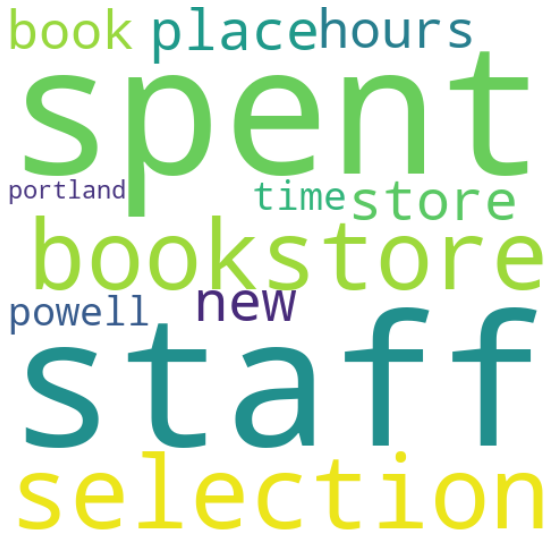

In [ ]:
topics = set(topic.split(' '))
text = ''
for value in topics:
  text = text + ' ' + value
text
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0,background_color="white").generate(text)
plt.figure(figsize=(10,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
df1 = used_data[used_data['avg_stars']==1].groupby('business_id').count().reset_index()[['business_id','stars']].rename(columns={'stars':'num_comment'})
df1.sort_values(by='num_comment',ascending=False)

,business_id,num_comment
152,aRY3fdEgWRH-l0llFnDY5w,9
201,kmtmY04UpdCfWz7sZI6V2w,9
16,2mDPPTvJA6yntcie-MkNGw,6
67,GNyAfMvNjPkuQ62PBVOtiA,6
38,8yX7VHwmrh6ZGF24yzGr4w,5
...,...,...
102,NvStapWNPcEJ4mjwMqVKKg,1
103,NwJ7m7XeYvAruDeFbqabGg,1
104,O6nRjoR62sSj0sPwiSj0FQ,1
105,O6nw5p6MQ8XweZ2Io88FDg,1


In [ ]:
print('1 stars negative topics(single business/restaurant)\n')
print('this sepcific business provide car renting business\n')
topic = getTopics(used_data[used_data['business_id']=='aRY3fdEgWRH-l0llFnDY5w'], topicsNum=5)

1 stars negative topics(single business/restaurant)

this sepcific business provide car renting business

Topic 1: service people waiting customer charge told read coming shuttle paid 
Topic 2: stars price experience buy online times night fees available shuttle 
Topic 3: late charged fee waiting coming scam read charge paid needed 
Topic 4: airport instead orlando took shuttle reviews economy website read waiting 
Topic 5: charge people minutes waiting pick booked day available fees scam 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


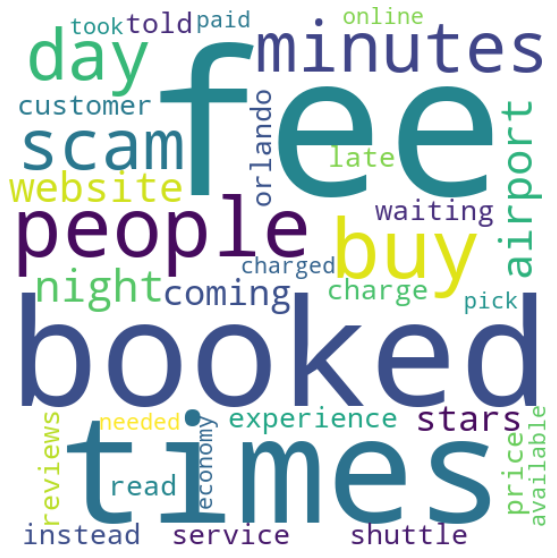

In [ ]:
topics = set(topic.split(' '))
text = ''
for value in topics:
  text = text + ' ' + value
text
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0,background_color="white").generate(text)
plt.figure(figsize=(10,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()